# Introduction to neural networks and deep learning

**Date:** 5th of March 2020 <br>
**Author:** Joan Térmens Cascalló

Here you could found two introductory exercices to the machine and deep learning methods. Based on [Hello world of Neural Network(for dummies)](https://www.kaggle.com/mobassir/hello-world-of-neural-network-for-dummies) and [Basic classification: Classify images of clothing](https://www.tensorflow.org/tutorials/keras/classification), respectively.

For some theoretical introduction look at:

* [Machine learning](https://en.wikipedia.org/wiki/Machine_learning) and [Deep learning](https://en.wikipedia.org/wiki/Deep_learning).

* or at [3Blue1Brown videos](https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi) on the field.

First of all, import the needed libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data procesing and dataframes
import matplotlib.pyplot as plt # basic plotting

# libraries for the neural networks and machine learning
from tensorflow import keras
import tensorflow as tf

# TensorFlow version
print("TensorFlow version: {}".format(tf.__version__))

TensorFlow version: 2.1.0


## 1. Simple exercice in neural networks

Define the training set (will be used to the *learning* process). As a simple example, we will use two 1-dim arrays, $x$ and $y$, such that:

$$y(x) = 2x -1$$

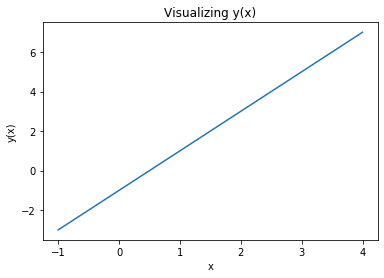

In [2]:
x = np.linspace(-1.0, 4.0, 6, endpoint=True)
y = np.array([2*x-1 for x in x], dtype=float)

# let's plot them

plt.plot(x,y)
plt.title('Visualizing y(x)')
plt.ylabel('y(x)')
plt.xlabel('x')
plt.show()

We define a simple neural network with just a single unit, as we have a simple 1-dim array `x` as the input. We use `sgd` optimizer and the `mean_squared_error` function to compute the loss function. For more info, [Keras optimizer](https://keras.io/optimizers/) and [Keras losses](https://keras.io/losses/).

In [3]:
network_struct = keras.layers.Dense(units =1, input_shape=[1])
model = keras.Sequential([network_struct])
model.compile(optimizer = 'sgd', loss = 'mean_squared_error')

Now we are going to tell our neural network(defined above) to learn `x` to `y` mapping for 100 epochs. An epoch is a single step in training a neural network. For each epoch the entire dataset is passed forward and backward through the neural network once. As the number of epochs increases, the neural network weights are iteratibly changed and the loss function curve goes from underfitting to optimal to overfitting. To learn more about this process, look [here](https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9).

In [4]:
training = model.fit(x,y, epochs = 100)

Train on 6 samples
Epoch 1/100
6/6 [==============================] - 0s 28ms/sample - loss: 53.0391
Epoch 2/100
6/6 [==============================] - 0s 218us/sample - loss: 42.1341
Epoch 3/100
6/6 [==============================] - 0s 255us/sample - loss: 33.5463
Epoch 4/100
6/6 [==============================] - 0s 258us/sample - loss: 26.7816
Epoch 5/100
6/6 [==============================] - 0s 251us/sample - loss: 21.4516
Epoch 6/100
6/6 [==============================] - 0s 287us/sample - loss: 17.2503
Epoch 7/100
6/6 [==============================] - 0s 436us/sample - loss: 13.9373
Epoch 8/100
6/6 [==============================] - 0s 458us/sample - loss: 11.3232
Epoch 9/100
6/6 [==============================] - 0s 259us/sample - loss: 9.2593
Epoch 10/100
6/6 [==============================] - 0s 566us/sample - loss: 7.6282
Epoch 11/100
6/6 [==============================] - 0s 241us/sample - loss: 6.3380
Epoch 12/100
6/6 [==============================] - 0s 251us/sample - 

Epoch 100/100
6/6 [==============================] - 0s 259us/sample - loss: 0.2696


Now the model is trained, so we can ask it to predict the corresponding `y` value for a `x` input and check its accuracy.

In [5]:
print('Predicted answer: ', model.predict([10.0]))

Predicted answer:  [[17.484802]]


The model predicts `y(x) = 17.484802` whereas the correct aswer would be `19`. Note that this network has only been trained with 6 samples, so if you ask it to predict what should be the aswer to an input that is far away from the train set it will fail. To do so, the network should be trained with much more and much more diverse samples.

To better understand the learning process we could display the loss as a function of the epoch number.

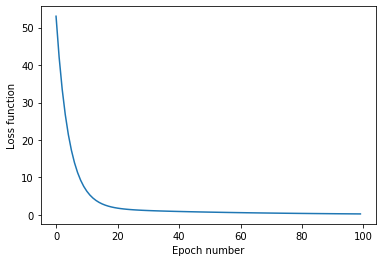

In [6]:
plt.xlabel('Epoch number')
plt.ylabel('Loss function')

plt.plot(training.history['loss'])

On the other hand, we could look at the network weights by

In [7]:
print("The layer weights are: {}".format(network_struct.get_weights()))

The layer weights are: [array([[1.7804047]], dtype=float32), array([-0.31924355], dtype=float32)]


Let's practice with a more complete example:

## 2. Classification of clothing images

(needs TensorFlow at version 2.1.0, may be installed using `pip install tensorflow` and `pip install --upgrade tensorflow`)

We are going to train a neural network model to classify images of clothing, like sneakers and shirts. To do so, we will use the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

![mnist example](img/fashion-mnist-sprite.png)

We will use 60,000 images to train the network and 10,000 images to evaluate how accurately the network learned to classify images. It is possible to access the Fashion MNIST directly from TensorFlow. To import and load the Fashion MNIST data directly from `TensorFlow` we could do the following:

In [8]:
# import and save the dataset as a variable
fashion_mnist = keras.datasets.fashion_mnist

# load the images that will be used to train and test
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the training set (the data that the model uses to learn).
* The model is tested against the test set, the `test_images`, and `test_labels` arrays to check its accuracy.

The images are 28x28 `NumPy` arrays, with pixel values ranging from 0 to 255 (grayscale). The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

**Label** | **Class**
----------|-------------
0         | T-shirt/top 
1         | Trouser
2         | Pullover
3         | Dress
4         | Coat
5         | Sandal
6         | Shirt
7         | Sneaker
8         | Bag
9         | Ankle Boot

Each image is mapped to a single label. Since the class names are not included with the dataset, we store them ina list to use later when plotting the images:

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker',\
               'Bag', 'Ankle boot']

### 2.1. Exploring the data

Before training the model it is important to know the format of the dataset and to ensure that every element has the same. To know the size and shape of the dataset's elements:

In [10]:
train_shape = train_images.shape
print("The train dataset contains {} images, each stored as a {}x{} numpy array."\
      .format(*train_shape)) # *array unpacks the array, so if array = [a,b,c]; *array = a,b,c

The train dataset contains 60000 images, each stored as a 28x28 numpy array.


And for the labels:

In [11]:
print("The train dataset contains {} labels and each one is an integer between 0 and 9: {}."\
      .format(len(train_labels), train_labels))

The train dataset contains 60000 labels and each one is an integer between 0 and 9: [9 0 0 ... 3 0 5].


We could do the same for the test set and ensure that both sets have the same format.

In [12]:
test_shape = test_images.shape
print("The test dataset contains {} images, each stored as a {}x{} numpy array.\n"\
      .format(*test_shape)) # *array unpacks the array, so if array = [a,b,c]; *array = a,b,c

print("The test dataset contains {} labels and each one is an integer between 0 and 9: {}."\
      .format(len(test_labels), test_labels))

The test dataset contains 10000 images, each stored as a 28x28 numpy array.

The test dataset contains 10000 labels and each one is an integer between 0 and 9: [9 2 1 ... 8 1 5].


### 2.2. Data preprocessing

The data must be preprocessed before training the network. The first step will be data normalization: the images of this dataset have pixels (elements in its matrix) that range from 0 to 255. To feeding the neural network we have to scale this values to a range of 0 to 1.

In [13]:
# Normalization

train_images = train_images/255.0
test_images = test_images/255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

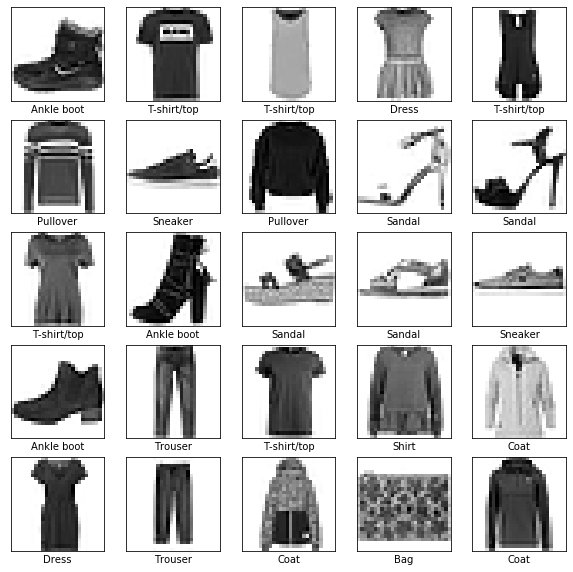

In [14]:
num_img = 25

plt.figure(figsize = (10,10))
for i in range(num_img):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### 2.3. Building the model

Building the neural network requires two setps: configuration of the layers of the model and compilation of the model.

#### 2.3.1 Set up the layers

The basic building block of a neural network is the *layer*. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

There are a lot of different structures of layers, but the most simple and common approach in deep learning consists of chaining togheter simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned (or, in more rigorous words, optimized) during training.

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(train_shape[1],train_shape[2])),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10)
])

As could be seen, this modes has three layers:

* The first layer, `keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28x28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels).This layer has no parameters to learn, it only reformats the data.
<br><br>
* After the pixels are flattened, the network consists of a sequence of two `keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers (each node has edges to each other node of the layer). The first Dense layer has 128 nodes (or neurons). The second (and last) layer is a 10-node softmax layer that returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

#### 2.3.2 Compiling the model

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

* *Loss function:* measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* *Optimizer:* This determines how the model is updated based on the data it sees and its loss function.
* *Metrics:* Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### 2.4. Training the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model "learns" to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


#### 2.4.1. Feed the model

To start training, call the `model.fit method`, so called because it "fits" the model to the training data:

In [17]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.4995 - accuracy: 0.8241
Epoch 2/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3765 - accuracy: 0.8647
Epoch 3/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3398 - accuracy: 0.8767
Epoch 4/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3139 - accuracy: 0.8856
Epoch 5/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2947 - accuracy: 0.8924
Epoch 6/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2794 - accuracy: 0.8955
Epoch 7/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2688 - accuracy: 0.8996
Epoch 8/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2562 - accuracy: 0.9056
Epoch 9/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2474 - accuracy: 0.9083
Epoch 10/10
60

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.9108 (or $\approx$ 91%) on the training data. Now let's evaluate it.

#### 2.4.2. Accuracy evaluation

In this step we will compare how the model performs on the test dataset:

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print("\nTest accuracy: ", test_acc)

10000/10000 - 0s - loss: 0.3460 - accuracy: 0.8811

Test accuracy:  0.8811


As could be seen, the test accuracy is a little bit lower than the accuracy obtained with the training dataset. This gap between training and test accuracy represents *overfitting*. Overfitting happens when a machine learning model performs worse on new, previously unseen, inputs than on the training data. An overfitted model kind of "memorizes" the training data, so it generates a disminution in the accuracy with the testing data. Overfitting is an important problem to look for when designing and testing. For more information follow the next links:

* [Overfitting (theoretical)](https://en.wikipedia.org/wiki/Overfitting)
* [Demonstarte overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
* [Strategies to prevent overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

### 2.5. Making predictions

With the model trained, you can use it to make predictions about some images. The model's linear outputs, *logits*. Attach a softmax layer to convert the logits to probabilities, which are easier to interpret.

> **Logits:** The vector of raw (non-normalized) predictions that a classification model generates, which is ordinarily then passed to a normalization function. If the model is solving a multi-class classification problem, logits typically become an input to the softmax function. The softmax function then generates a vector of (normalized) probabilities with one value for each possible class.

In [19]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [20]:
predictions[0]

array([3.0881726e-08, 1.4263416e-08, 1.0950061e-08, 3.1947394e-08,
       1.5604544e-09, 1.3043678e-04, 1.1855535e-06, 7.6209237e-03,
       2.7568703e-08, 9.9224734e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [21]:
print("The maximum confidence ({}%) is that the images is an {},"\
      .format(round(np.max(predictions[0])*100,2),class_names[np.argmax(predictions[0])]))

The maximum confidence (99.22%) is that the images is an Ankle boot,


which is correct:

In [22]:
print("Corresponding label: {}".format(class_names[test_labels[0]]))

Corresponding label: Ankle boot


Graph this to look at the full set of 10 class predictions.

In [23]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


### 2.6 Plot and verify the predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

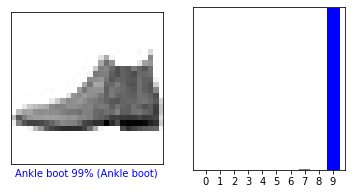

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

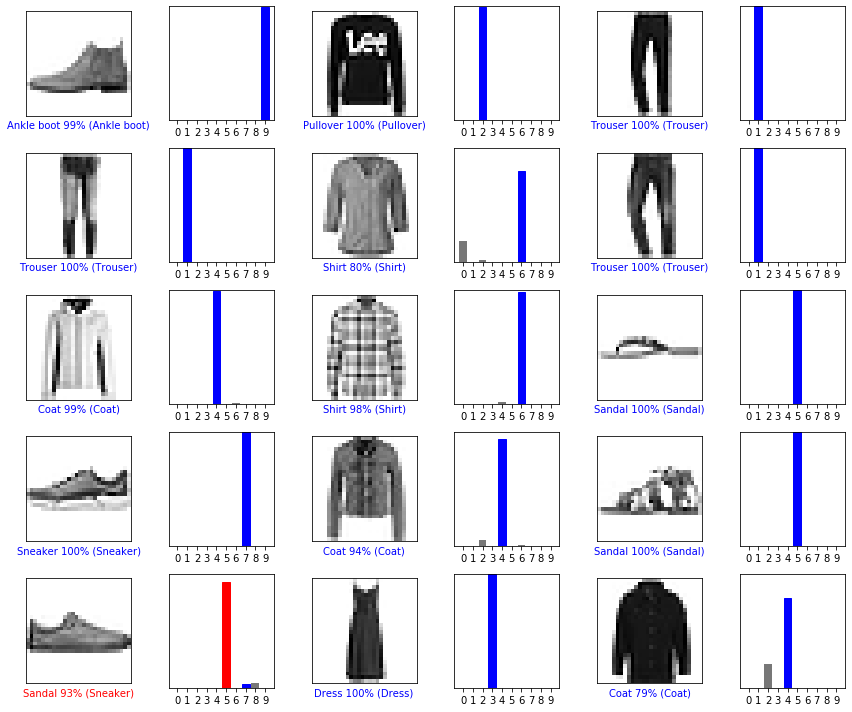

In [25]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


### 2.7. Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [38]:
# take an image from the dataset

img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [39]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


and predict the correct label for this image:

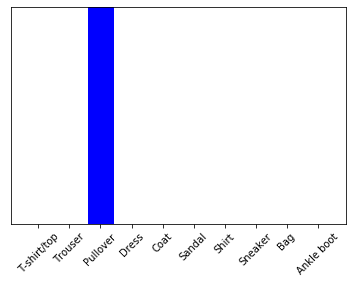

In [40]:
predictions_single = probability_model.predict(img)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`keras.Model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [41]:
class_names[np.argmax(predictions_single[0])
]

'Pullover'

And the model predicts a label as expected.

#### Copyright of *Classification of clothing images*

`MIT License`

`Copyright (c) 2017 François Chollet`

`Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:`

`The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.`

`THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.`